<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__1)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-1'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-1.csv',
 'data_multi_delta_0_n30-1.csv',
 'data_multi_delta_0_n60-1.csv',
 'data_multi_delta_0_n120-1.csv',
 'data_multi_delta_0_n250-1.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20-1.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.476308,201.100000,200.837324,0.262676
1,0.0,1.0,57.329540,67.934475,53.739469,1.227234,190.230718,188.857861,1.372857
2,0.0,2.0,45.215694,51.000161,43.520343,0.175877,149.912075,150.028966,-0.116891
3,0.0,3.0,69.375325,41.455180,64.082408,-2.569694,182.343218,185.209005,-2.865787
4,0.0,4.0,87.837297,72.508079,90.676124,-0.280070,260.741430,260.477648,0.263782
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,1.394807,213.468241,212.104744,1.363497
19996,999.0,16.0,62.971081,59.155436,22.434296,1.625722,156.186535,154.467560,1.718975
19997,999.0,17.0,37.323768,53.799677,46.207262,0.054712,147.385420,147.249573,0.135847
19998,999.0,18.0,42.204721,36.635143,97.635290,0.244496,186.719650,186.315386,0.404264


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.476308,201.100000,200.837324,0.262676
1,0.0,1.0,57.329540,67.934475,53.739469,1.227234,190.230718,188.857861,1.372857
2,0.0,2.0,45.215694,51.000161,43.520343,0.175877,149.912075,150.028966,-0.116891
3,0.0,3.0,69.375325,41.455180,64.082408,-2.569694,182.343218,185.209005,-2.865787
4,0.0,4.0,87.837297,72.508079,90.676124,-0.280070,260.741430,260.477648,0.263782
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,1.394807,213.468241,212.104744,1.363497
19996,999.0,16.0,62.971081,59.155436,22.434296,1.625722,156.186535,154.467560,1.718975
19997,999.0,17.0,37.323768,53.799677,46.207262,0.054712,147.385420,147.249573,0.135847
19998,999.0,18.0,42.204721,36.635143,97.635290,0.244496,186.719650,186.315386,0.404264


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  201.100000  200.837324  0.262676
      1.0    57.329540  67.934475  53.739469  ...  190.230718  188.857861  1.372857
      2.0    45.215694  51.000161  43.520343  ...  149.912075  150.028966 -0.116891
      3.0    69.375325  41.455180  64.082408  ...  182.343218  185.209005 -2.865787
      4.0    87.837297  72.508079  90.676124  ...  260.741430  260.477648  0.263782
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  213.468241  212.104744  1.363497
      16.0   62.971081  59.155436  22.434296  ...  156.186535  154.467560  1.718975
      17.0   37.323768  53.799677  46.207262  ...  147.385420  147.249573  0.135847
      18.0   42.204721  36.635143  97.635290  ...  186.719650  186.315386  0.404264
      19.0   88.522268  25.681428  82.018999  ...  205.422271  205.926653 -0.504382

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  201.100000  200.837324  0.262676
      1.0    57.329540  67.934475  53.739469  ...  190.230718  188.857861  1.372857
      2.0    45.215694  51.000161  43.520343  ...  149.912075  150.028966 -0.116891
      3.0    69.375325  41.455180  64.082408  ...  182.343218  185.209005 -2.865787
      4.0    87.837297  72.508079  90.676124  ...  260.741430  260.477648  0.263782
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  213.468241  212.104744  1.363497
      16.0   62.971081  59.155436  22.434296  ...  156.186535  154.467560  1.718975
      17.0   37.323768  53.799677  46.207262  ...  147.385420  147.249573  0.135847
      18.0   42.204721  36.635143  97.635290  ...  186.719650  186.315386  0.404264
      19.0   88.522268  25.681428  82.018999  ...  205.422271  205.926653 -0.504382

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.476308,201.100000,200.837324,0.262676
1,0.0,1.0,57.329540,67.934475,53.739469,1.227234,190.230718,188.857861,1.372857
2,0.0,2.0,45.215694,51.000161,43.520343,0.175877,149.912075,150.028966,-0.116891
3,0.0,3.0,69.375325,41.455180,64.082408,-2.569694,182.343218,185.209005,-2.865787
4,0.0,4.0,87.837297,72.508079,90.676124,-0.280070,260.741430,260.477648,0.263782
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,1.394807,213.468241,212.104744,1.363497
19996,999.0,16.0,62.971081,59.155436,22.434296,1.625722,156.186535,154.467560,1.718975
19997,999.0,17.0,37.323768,53.799677,46.207262,0.054712,147.385420,147.249573,0.135847
19998,999.0,18.0,42.204721,36.635143,97.635290,0.244496,186.719650,186.315386,0.404264


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  201.100000  200.837324  0.262676
      1.0    57.329540  67.934475  53.739469  ...  190.230718  188.857861  1.372857
      2.0    45.215694  51.000161  43.520343  ...  149.912075  150.028966 -0.116891
      3.0    69.375325  41.455180  64.082408  ...  182.343218  185.209005 -2.865787
      4.0    87.837297  72.508079  90.676124  ...  260.741430  260.477648  0.263782
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  213.468241  212.104744  1.363497
      16.0   62.971081  59.155436  22.434296  ...  156.186535  154.467560  1.718975
      17.0   37.323768  53.799677  46.207262  ...  147.385420  147.249573  0.135847
      18.0   42.204721  36.635143  97.635290  ...  186.719650  186.315386  0.404264
      19.0   88.522268  25.681428  82.018999  ...  205.422271  205.926653 -0.504382

[20000 rows x 7 columns]

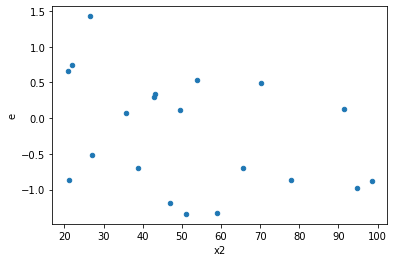

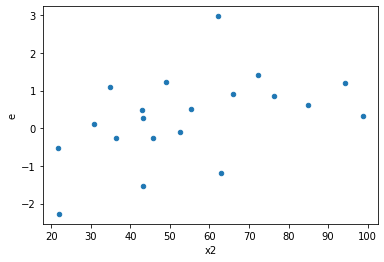

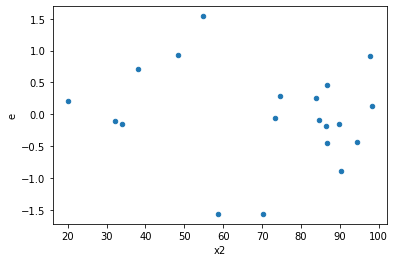

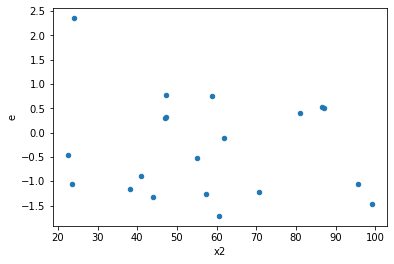

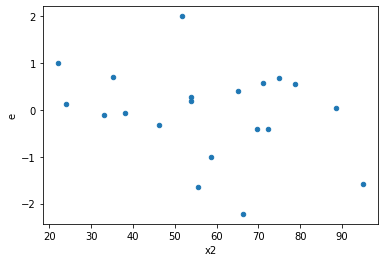

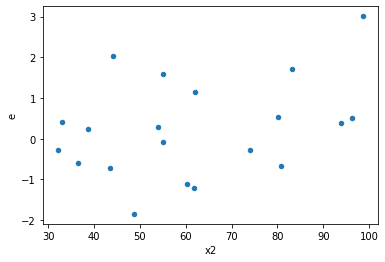

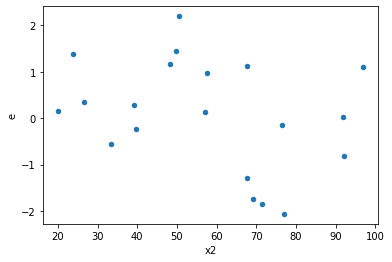

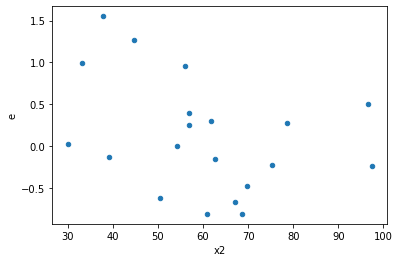

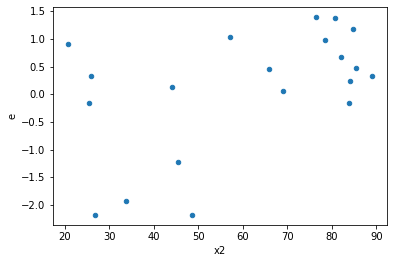

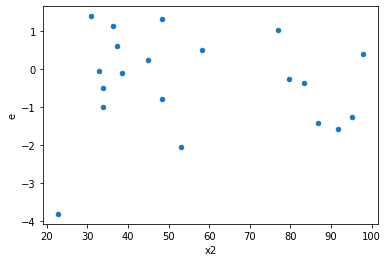

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,7.530177265481288,8.27676163967497,1.5060354530962576,1.655352327934994,1.099145657249805,0.9199068352112809,0.5400465823943595,0.45995341760564046,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,1.1967817499334958,14.33005029176092,0.23935634998669916,2.8660100583521837,11.973820867971314,0.016463314836512977,0.9917683425817435,0.008231657418256488,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,3.295112797171954,5.364849154858833,0.6590225594343908,1.0729698309717666,1.6281230674298128,0.6057481534439888,0.6971259232780056,0.3028740767219944,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,0.7817874520288246,5.188944691390445,0.1563574904057649,1.037788938278089,6.6372831617143015,0.05819263726543289,0.9709036813672836,0.029096318632716445,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,3.4142985334400895,7.772109086034228,0.6828597066880179,1.5544218172068456,2.2763413948467504,0.3876758063719983,0.8061620968140009,0.19383790318599914,Reject005=1 : Homoscedasticity
14.0,5.0,5.0,2.379028994139721,4.133971819185081,0.4758057988279442,0.8267943638370163,1.737671894444466,0.5589871540093054,0.7205064229953473,0.2794935770046527,Reject005=1 : Homoscedasticity
26.0,5.0,5.0,1.9913199470147314,3.6140935946211936,0.3982639894029463,0.7228187189242388,1.8149236138769305,0.5288613987677606,0.7355693006161197,0.2644306993838803,Reject005=1 : Homoscedasticity
27.0,5.0,5.0,0.47787503986539737,2.419125474740219,0.09557500797307947,0.48382509494804377,5.062255344873446,0.09954794719835958,0.9502260264008202,0.04977397359917979,Reject005=1 : Homoscedasticity
38.0,5.0,5.0,1.2797770818303766,3.413983584632341,0.25595541636607533,0.6827967169264683,2.66763925772882,0.3053477933157738,0.8473261033421131,0.1526738966578869,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,7.530177265481288,8.27676163967497,1.5060354530962576,1.655352327934994,1.099145657249805,0.9199068352112809,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,6.387928356720714,5.449969067678682,1.2775856713441427,1.0899938135357363,0.8531669053465184,0.865910684554856,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,7.44918742834596,3.6611591011477738,1.489837485669192,0.7322318202295548,0.49148435804100965,0.4542386007445513,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,1.1967817499334958,14.33005029176092,0.23935634998669916,2.8660100583521837,11.973820867971314,0.016463314836512977,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,6.433567796468232,5.277938683996115,1.2867135592936463,1.055587736799223,0.8203750781787813,0.8332989966657189,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,7.616417463364016,1.5712135391044157,1.5232834926728032,0.31424270782088315,0.2062929909845623,0.1081471870114763,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,4.122667907148128,1.2114235162626366,0.8245335814296256,0.24228470325252732,0.29384455492090406,0.20504570936180075,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,6.127176309622177,5.698393709110477,1.2254352619244355,1.1396787418220955,0.9300195426336376,0.9384853720081877,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,3.295112797171954,5.364849154858833,0.6590225594343908,1.0729698309717666,1.6281230674298128,0.6057481534439888,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      922
Reject005=0 : Heteroscedasticity     78
Name: Result_test, dtype: int64